AnnData object with n_obs × n_vars = 1541 × 34
    obs: 'core', 'meta_id', 'meta_label', 'cell_type_id', 'cell_type', 'phenograph_cluster', 'CellId', 'id'
    var: 'feature_type', 'metal_tag', 'fullstack_index', 'channel', 'full_target_name'
    uns: 'mask', 'metadata'
    obsp: 'knn', 'radius', 'contact', 'delaunay_test'
AnnData object with n_obs × n_vars = 1541 × 34
    obs: 'core', 'meta_id', 'meta_label', 'cell_type_id', 'cell_type', 'phenograph_cluster', 'CellId', 'id', 'y', 'x'
    var: 'feature_type', 'metal_tag', 'fullstack_index', 'channel', 'full_target_name'
    uns: 'mask', 'metadata'
    obsp: 'knn', 'radius', 'contact', 'delaunay_test'
AnnData object with n_obs × n_vars = 1541 × 34
    obs: 'core', 'meta_id', 'meta_label', 'cell_type_id', 'cell_type', 'phenograph_cluster', 'CellId', 'id', 'y', 'x'
    var: 'feature_type', 'metal_tag', 'fullstack_index', 'channel', 'full_target_name'
    uns: 'mask', 'metadata', 'cmaps', 'cmap_labels'
    obsp: 'knn', 'radius', 'contact', 

/var/folders/_j/41j6_sxx0nd0dj6hfw6sfj21_4h64s/T/ipykernel_24270/1473843222.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


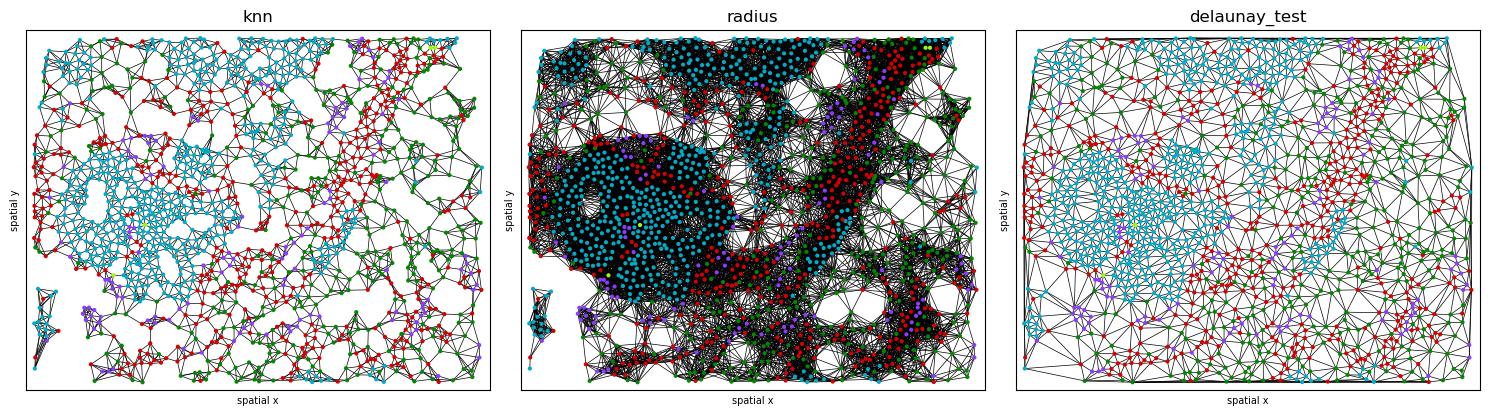

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

import athena as ath
# ad = ath.dataset.imc(force_download=True)
data = ath.dataset.imc()
data

sample_name = list(data.keys())[0]
ad = data[sample_name]
#print(ad.uns['mask'])

ath.graph.build_graph(ad, topology="delaunay", graph_key = "delaunay_test")
print(ad)

from skimage.measure import regionprops_table
import pandas as pd


for spl in data.keys():
    ad = data[spl]
    centroids = pd.DataFrame(regionprops_table(ad.uns['mask'], properties=('label', 'centroid')))
    centroids.columns = ['object_id', 'y', 'x']
    centroids = centroids.set_index('object_id')
    centroids.index = centroids.index.astype(str)  # we need to convert to `str` to match the index of `ad.obs`
    ad.obs = pd.concat((ad.obs, centroids), axis=1)
ad = data[sample_name]
print(ad)

# cell_type colormap
import colorcet

cmap_cell_type = {
    'background': 'white',
    'immune': 'darkgreen',
    'endothelial': 'gold',
    'stromal': 'steelblue',
    'tumor': 'darkred',
    'myoepithelial': 'coral'
}

for ad in data.values():
    # define default colormap
    ad.uns['cmaps'] = {}
    ad.uns['cmaps'].update({'default': cm.Reds})
    ad.uns['cmaps']['category'] = colorcet.glasbey_bw
    #ad.uns['cmaps'].update({'meta_label': cmap_meta_label})
    ad.uns['cmaps'].update({'cell_type': cmap_cell_type})
    ad.uns['cmap_labels'] = {}
    


ad = data[sample_name]
print(ad)

fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
for topology, ax in zip(['knn', 'radius', 'delaunay_test'], axs):
    ath.pl.spatial(ad=ad, attr='cell_type_id', edges=True, graph_key=topology, ax=ax, cbar=False)
    ax.set_title(topology)
fig.show()